In [14]:
import sklearn as sk
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt


In [15]:
def RMSE(y_pred, y_actual):
    mse = mean_squared_error(y_actual, y_pred)
    rmse = sqrt(mse)
    return rmse

In [16]:
def split(dataframe, split = 0.7, seed=0):
    np.random.seed(seed)
    rand = np.random.rand(len(data_df)) < split
    
    train = dataframe[rand]
    test = dataframe[~rand]
    
    return train, test

In [17]:
rtr = RandomForestRegressor(n_estimators = 100, random_state = 10, max_depth = 6)

In [18]:
#read data from csv
data_df = pd.read_csv('filtered_experiment4_fluid1.csv')

data_train, data_test = split(data_df, split=0.7)

#split data into test and train
X_train = data_train.iloc[:, 2:5].values
y_train = data_train.iloc[:, 1].values

X_test = data_test.iloc[:, 2:5].values
y_test = data_test.iloc[:, 1].values
data_train

,Unnamed: 0,FT-14A,LT-15,LT-17,LT-18,FT-14B,GammaDensity,FT-20A,FT-20C,TT-13,PT-11,PDT-12
0,0,269.30,69.63,67.31,45.35,1143.37,1.22,1143.37,2.45,18.63,0.48,4.98
2,2,269.30,69.63,67.31,45.35,1143.37,1.22,1143.37,2.45,18.63,0.48,4.98
3,3,269.30,69.63,67.31,45.35,1143.37,1.22,1143.37,2.45,18.63,0.48,4.98
4,4,269.30,69.63,67.31,45.35,1143.37,1.22,1143.37,2.45,18.63,0.48,4.98
5,5,269.30,69.63,67.31,45.35,1143.37,1.22,1143.37,2.45,18.63,0.48,4.98
...,...,...,...,...,...,...,...,...,...,...,...,...
4432,4432,253.19,64.48,68.28,42.95,1145.02,1.21,1145.02,2.01,20.15,0.48,5.22
4434,4434,252.97,64.41,68.22,42.94,1145.02,1.21,1145.02,2.01,20.15,0.48,5.22
4435,4435,252.86,64.37,68.19,42.93,1145.02,1.21,1145.02,2.01,20.15,0.48,5.21
4436,4436,252.75,64.33,68.16,42.93,1145.02,1.21,1145.02,2.01,20.15,0.48,5.21


In [19]:
rtr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=10)

In [20]:
predictions = rtr.predict(X_test)
y_train_pred = rtr.predict(X_train)

In [21]:
rmse_test = RMSE(predictions, y_test)
rmse_train = RMSE(y_train_pred, y_train)

print(f'RMSE Test: {round(rmse_test,2)}')
print(f'RMSE Train: {round(rmse_train,2)}')

score_train = rtr.score(X_train, y_train)
score_test = rtr.score(X_test, y_test)

print(f'Train Accuracy: {round(score_train,2)*100}% Test Accuracy: {round(score_test,2)*100}%')

RMSE Test: 0.77
RMSE Train: 0.65
Train Accuracy: 100.0% Test Accuracy: 100.0%


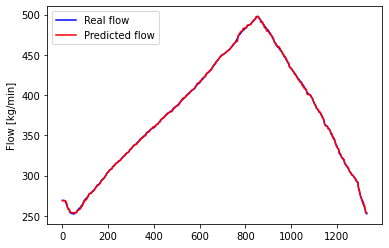

In [22]:
plt.plot(y_test, label = 'Real flow', color='blue')
plt.plot(predictions, label = 'Predicted flow', color='red')
plt.ylabel('Flow [kg/min]')

plt.legend()
plt.show()

In [23]:
from sklearn.tree import export_graphviz
import pydot

In [24]:
feature_list = ['LT-15', 'LT-17', 'LT-18']

In [36]:
"""tree = rtr.estimators_[5]
export_graphviz(tree, out_file='tree.dot',
               rounded=True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_pdf('test.pdf')"""

"tree = rtr.estimators_[5]\nexport_graphviz(tree, out_file='tree.dot',\n               rounded=True, precision = 1)\n\n(graph, ) = pydot.graph_from_dot_file('tree.dot')\ngraph.write_pdf('test.pdf')"

In [26]:
# Limit depth of tree to 3 levels
"""rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(x_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'C:\Users\ole-1\Desktop\Hard sensors case project\small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');
"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 231-232: truncated \UXXXXXXXX escape (<ipython-input-26-e3a3a64f9f42>, line 10)

In [27]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [28]:
def split(dataframe, split = 0.7, seed=0):
    np.random.seed(seed)
    rand = np.random.rand(len(data_df)) < split
    
    train = dataframe[rand]
    test = dataframe[~rand]
    
    return train, test

In [29]:
#reading sensor data into data frame.
path = 'fitting_data.csv'
data_df = pd.read_csv(path)

train, test = split(data_df, seed=0, split=0.7)

X_train = train.iloc[:,0:11]
y_train = train.iloc[:,11]

X_test = test.iloc[:,0:11]
y_test = test.iloc[:,11]


In [30]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
y_pred = clf.predict(X_test)

Training score: 100.0%, test score: 100.0%


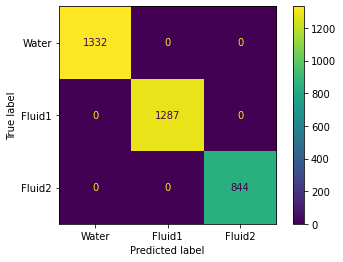

In [32]:
sk.metrics.plot_confusion_matrix(clf, X_test, y_test, labels=['Water', 'Fluid1', 'Fluid2'])

#sk.metrics.confusion_matrix(y_val, y_pred, labels=[1,2,3])
score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)

print(f'Training score: {round(score_train,2)*100}%, test score: {round(score_test,2)*100}%')

In [33]:
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', rounded = True, )
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
